## 1.1 Introduction

### 1.1.1 The Bayesian State of Mind

Frequentists:
* probability is the long-run frequency of events
* P(plane accidents) is the long-run frequency of plane accidents
* makes sense for many events but becomes more difficult when there is no long-term frequency

The Bayesian worldview:
* Bayesian inference preserves _uncertainty_
* probability is a measure of _believablility_ in an event
* "How confident are you that ____ will happen?"

P(A) is the **prior probability**, P(A|X) is the **posterior probability**

### 1.1.2 Bayesian Inference in Practice

My code passed all X tests; is my code bug-free?
* Frequentists: YES

Often my code has bugs. My code passed all X tests; is my code bug-free?
* Bayesians: P(YES) = 0.8, P(NO) = 0.2
* "Often my code has bugs" is the prior

For large N, statistical inference is objective. For small N, inference is unstable.

Frequentist estimates have more variance and larger confidence intervals. Bayesian estimates preserve the uncertainty.

### 1.1.3 Are Frequentist Method Incorrect?

No, useful in various contexts: least squares linear regression, LASSO regression, expectation-maximization algorithms

### 1.1.4 A Note on "Big Data"

Big data's prediction difficulty does not rely on alogrithm used, but instead in computational difficulties of storage and execution on data.

Gelman: Once N is "large enough," you can start subdividing the data to learn more. (Men v. women, northerns and southerners)

## 1.2 Our Bayesian Framework

$$ P(A|X) = \frac{P(X|A) P(A)}{ P(X) } $$
$$ P(A|X) \propto P(X|A)P(A) $$

### 1.2.1 Mandatory Coin-Flip

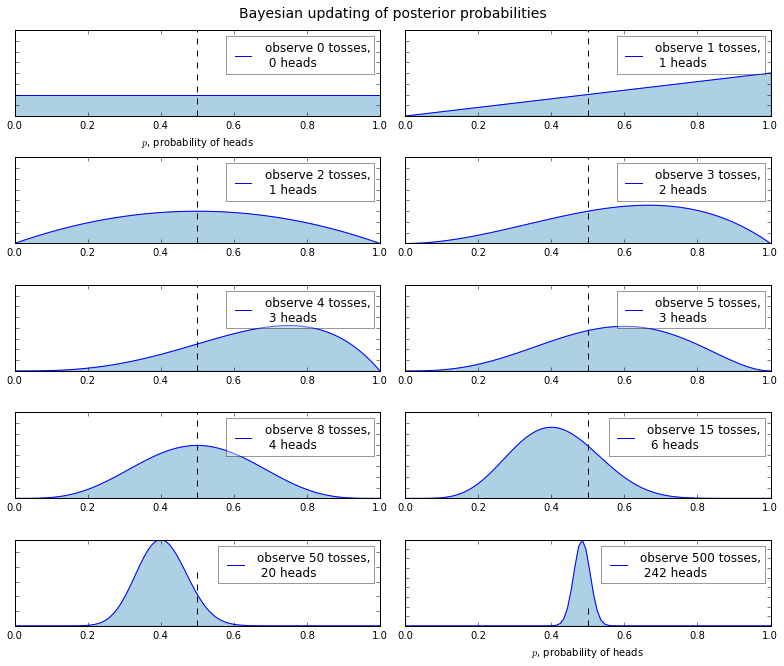

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

### 1.2.2 Librarian or Farmer?

Steve is shy, very helpful, and likes things in proper order. Is he more likely to be a librarian or a farmer?

There are 20 times as many male farmers as male librarians.

* Steve is a librarian: P(A) = 1/21 = 0.047 (our prior)
* P(X|A) = probability of description given Steve is a librarian, say about 0.95
* P(X) = probability of anyone having that description
    * P(X) = P(X and A) + P(X and ~A) 
    * P(X) = P(X|A)P(A) + P(X|~A)P(~A)
    * P(X) = (0.95)(0.047) + (0.5)(0.953) = **0.52**
$$ P(A|X) = \frac{P(X|A) P(A)}{ P(X) } = \frac{ (0.951)(0.047) }{ 0.52 } = 0.087 $$

**How our posterior belief about Steve changes after finding out about his personality:**

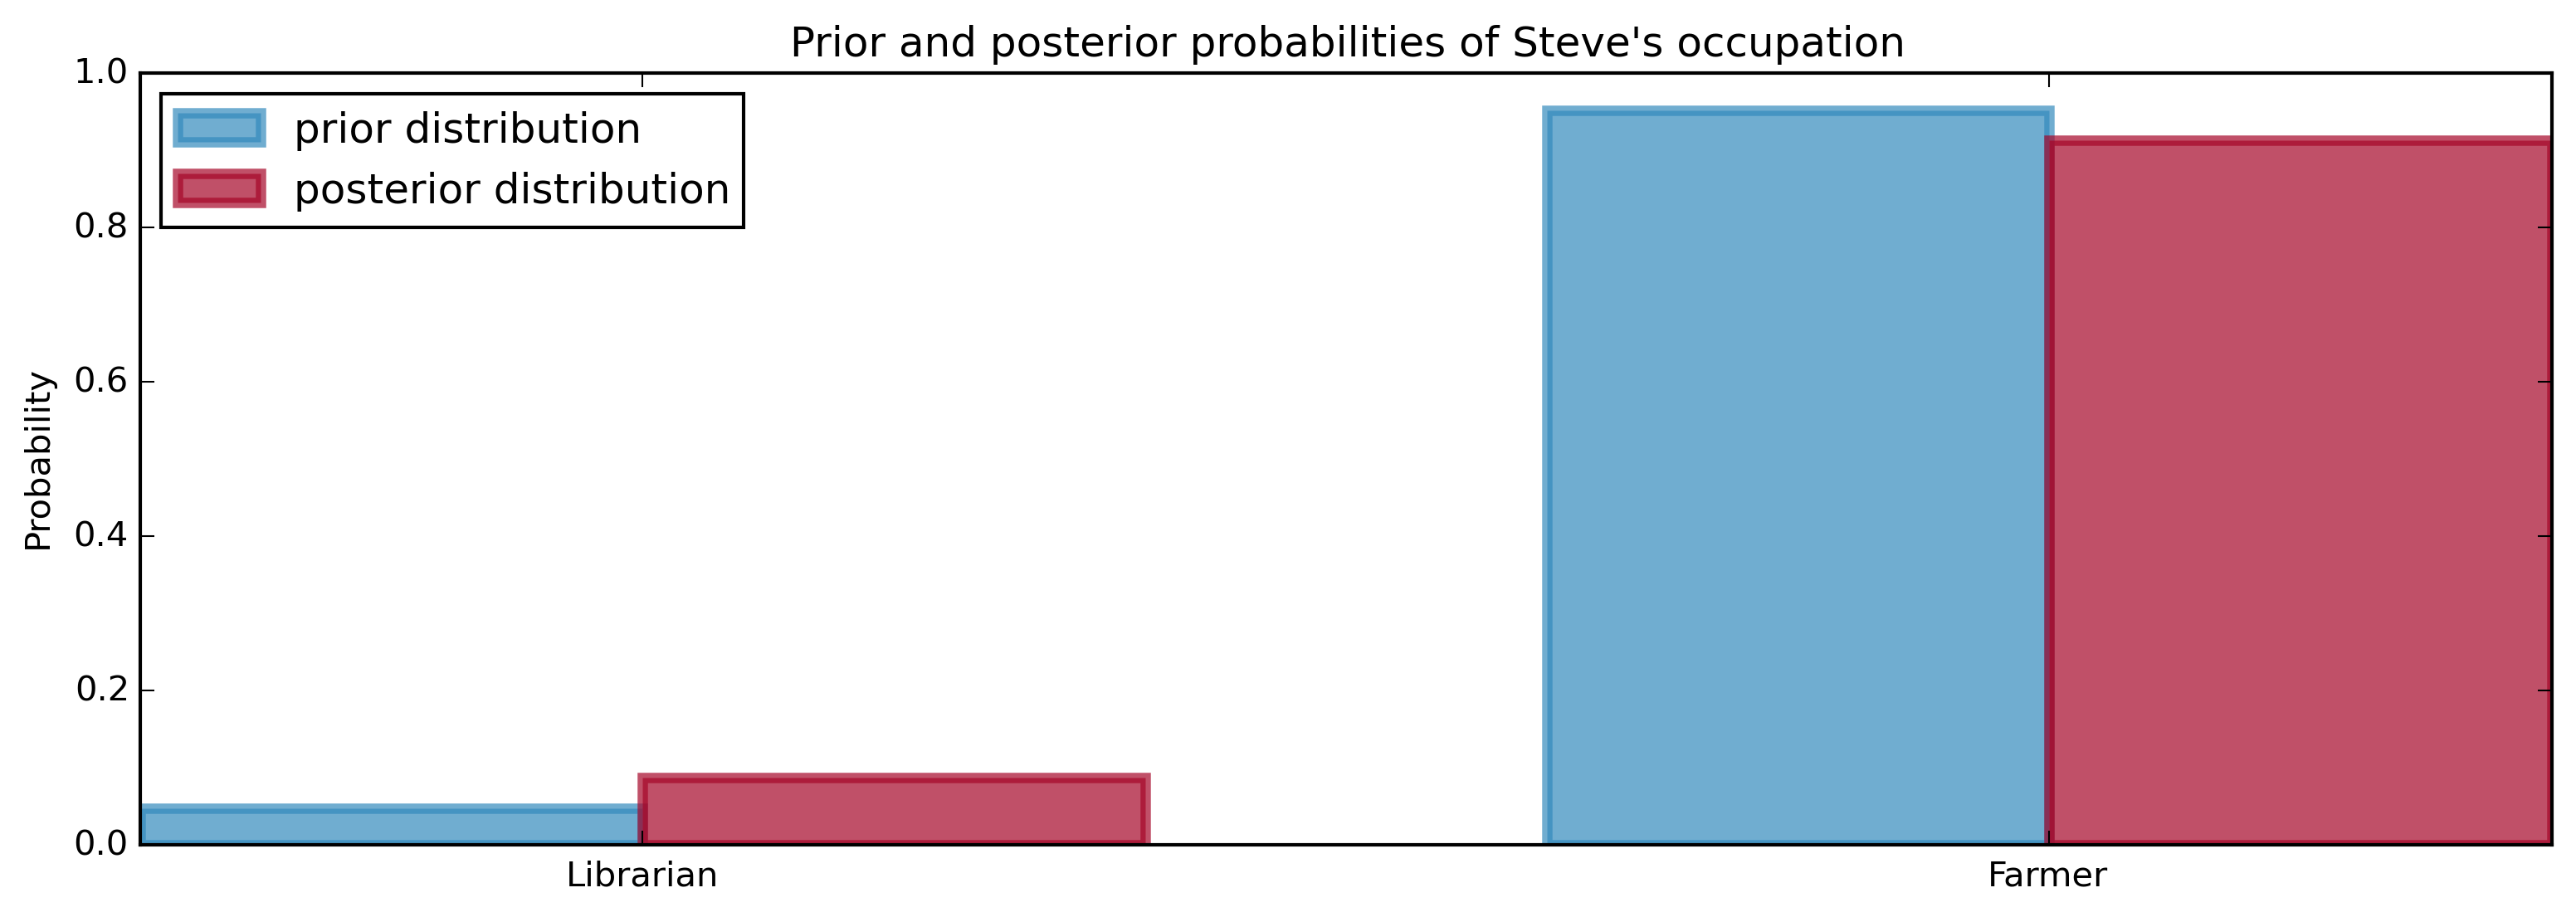

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

colors = ['#348ABD','#A60628']

prior = [1/21., 20/21.]
posterior = [0.087, 1-0.087]

plt.bar(
    [0, 0.7], prior, alpha=0.7, width=0.25,
    color=colors[0], label='prior distribution',
    lw='3', edgecolor=colors[0]
)
plt.bar(
    [0+0.25, 0.7+0.25], posterior, alpha=0.7, width=0.25,
    color=colors[1], label='posterior distribution',
    lw='3', edgecolor=colors[1]
)
plt.xticks([0.25, 0.95], ["Librarian", "Farmer"])
plt.title("Prior and posterior probabilities of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left")